In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train =  np.loadtxt('/home/bhavy/Dropbox/7th-semester/courses/ML/Assignments/Assignment/hw3/ridgetrain.txt')
data_test =  np.loadtxt('/home/bhavy/Dropbox/7th-semester/courses/ML/Assignments/Assignment/hw3/ridgetest.txt')

In [3]:
lamb = 0.1
lamblist = [0.1, 1, 10, 100]
rms = np.zeros(4).reshape(4, 1)
gamma = 0.1
N =  len(data_train)
N_test = len(data_test)

In [4]:
#plotting the data
x, y = data_train[:, 0].reshape(N, 1) , data_train[:, 1].reshape(N, 1)
x_test, y_test = data_test[:, 0].reshape(N_test, 1) , data_test[:, 1].reshape(N_test, 1)

In [5]:
def kernel(xn, xm):
    #gamma = 0.1 given
    return np.exp(-gamma*np.dot(xn-xm, xn-xm)) #rbf kernel

In [6]:
def compute_kernel_matrix(x):
    N = len(x)
    K = np.zeros((N, N), dtype ='float32')
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel(x[i], x[j])
    return K

In [7]:
def compute_alpha(K, lamb, y):
    N = K.shape[0]
    In = np.identity(N, dtype='float32')
    alpha  = np.dot(   np.linalg.inv(K + lamb*In) , y)
    return alpha

In [8]:
def pred(x_test, alpha):
    kector = np.zeros(N).reshape(N, 1)
    for i in range(N):
        kector[i] = kernel(x[i], x_test)
    return np.dot(np.transpose(alpha), kector)

In [9]:
def rmse(y1, y2):
    return np.sqrt(np.mean(np.dot(np.transpose(y1 - y2), y1-y2)))

In [10]:
K = compute_kernel_matrix(x)

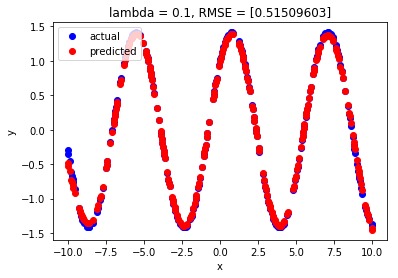

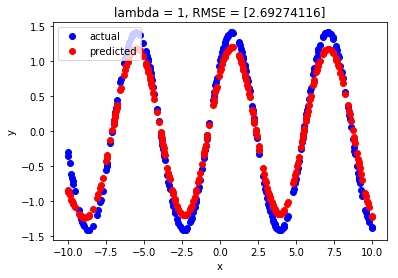

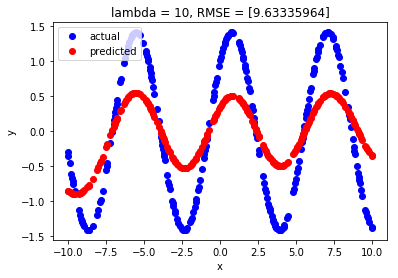

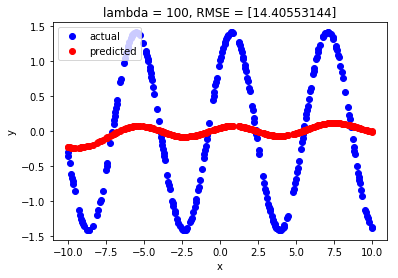

In [11]:
idx = 0
for lamb in lamblist:
    alpha = compute_alpha(K, lamb, y)
    y_pred = np.zeros(N_test).reshape(N_test, 1)
    for i in range(N_test):
        y_pred[i] = pred(x_test[i], alpha)
    rms[idx] = rmse(y_pred, y_test)
    plt.figure(idx + 1)
    plt.plot(x_test, y_test, 'bo', label = 'actual')
    plt.plot(x_test, y_pred, 'ro', label = 'predicted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc = 'upper left')
    plt.title('lambda = '+ str(lamb) + ', RMSE = ' + str(rms[idx]))
    plt.savefig(str(idx)+'-kernel-ridge-regression.png')
    idx = idx+1

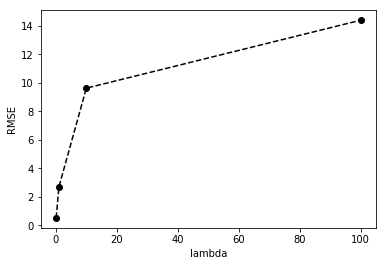

In [12]:
plt.plot(lamblist, rms, 'ko--')
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.savefig('lambda-rmse.png')